# Modelo de recomendaciones para vacantes de trabajo

La idea de esta prueba técnica es poder construir un modelo sencillo para poder recomendar vacantes laborales a personas en búsqueda de empleo. 

Para ello vamos a trabajar la prueba en dos fases:
1. Extracción y preparación de los datos que vayan a ser usados como input 
2. Construcción y ejecución del modelo que se proponga

## Fase 1: Extraccion y preparación de los datos

En esta primera parte se requiere construir la base de datos que se usará para generar recomendaciones laborales. Para ello vamos a considerar dos fuentes de datos: 

1. Datos de personas buscando empleo
2. Datos de vacantes de trabajo disponibles

### Datos de personas en búsqueda de empleo

En este primer bloque de código debes traer los datos de las personas en busqueda laboral 

url = https://docs.google.com/spreadsheets/d/1O1N08D-5NnWjnKJ6LrU0hjbYjgN6BPrN1Cg1FWQ8Y4w/edit?usp=sharing

**diccionario de columnas:**

* `anonymous_user` : identificador de usuario anonimizado
* `puestos_postulandose` : array() de los tipos de puestos a los que la persona desea aplicar
* `subareas_trabajo` : array() de las areas de trabajo a las que la persona desea aplicar
* `nivel_de_ingles` : nivel de ingles de la persona  

Sigue la documentacion aquí como una posible guía para traer los datos desde el google sheets: 

[Como traer datos a pandas desde google sheets](https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550)

al final asegurate de que el dataframe conteniendo la data de la personas se guarde como `personas_df`

In [228]:
import pandas as pd
import numpy as np

# escribe tu código aquí

"""
Importamos el input de los aspirante
"""

sheet_id = "1O1N08D-5NnWjnKJ6LrU0hjbYjgN6BPrN1Cg1FWQ8Y4w"
sheet_name = 'raw_data'
url = "https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}".format(sheet_id,sheet_name)

personas_df = pd.read_csv(url)
personas_df.shape

(498, 4)

In [178]:
personas_df

,anonymous_user,puestos_postulandose,subareas_trabajo,nivel_de_ingles
0,1618000323830x362018203359960400,"[""EJECUTIVO COMERCIAL"",""EJECUTIVO COMERCIAL SE...","[""SALES DEVELOPMENT REPRESENTATIVE"",""ALIANZAS ...",B2
1,1618000327090x719430495377363000,"[""CATEGORY MANAGER"",""TRADE MARKETING"",""JEFE DE...","[""TRADE MARKETING"",""MARKETING TRADICIONAL"",""BT...",NaN
2,1618000319551x933095875032710000,"[""ANALISTA COMERCIAL""]",NaN,NaN
3,1618000413582x178407966300603970,"[""GROWTH MANAGER"",""PRODUCT OWNER"",""ASSOCIATE C...","[""PROJECT MANAGEMENT"",""BUSINESS DEVELOPMENT"",""...",NaN
4,1618000427641x683959807166868600,"[""COMUNICACIÓN SOCIAL"",""GERENCIA PARA EL DESAR...",NaN,NaN
...,...,...,...,...
493,1620737499544x603745860709455900,NaN,NaN,NaN
494,1620738825622x904563646904868600,"[""KAM"",""EJECUTIVO DE CUENTA"",""EJECUTIVO COMERC...","[""KAM"",""BUSINESS DEVELOPMENT"",""EJECUTIVO COMER...",B1 - Intermedio
495,1620671225223x489458405364063170,NaN,NaN,NaN
496,1620741381945x456032843223592060,NaN,NaN,NaN


In [229]:
"""
Editamos las variables vacias y nulas, como nulas
"""

personas_df['puestos_postulandose'] = personas_df['puestos_postulandose'].apply(lambda x : str(x))
personas_df['puestos_postulandose'] = personas_df['puestos_postulandose'].astype('object')
personas_df['puestos_postulandose'] = personas_df['puestos_postulandose'].replace('[]',np.nan)
personas_df['puestos_postulandose'] = personas_df['puestos_postulandose'].replace('nan',np.nan)

In [230]:
"""
analizamos la 'distribución' de cada variable en el input"
"""

ind = personas_df[personas_df['puestos_postulandose'].notnull()==True].index
corpus = [posicion[1:-1].replace("\"","").split(",") for posicion in personas_df.loc[ind,'puestos_postulandose']]
puestos_postulandose = list(pd.Series([str(w).upper() for l in corpus for w in l]).value_counts().index)
pd.Series([str(w).upper() for l in corpus for w in l]).value_counts()

PROJECT MANAGER                      20
PRODUCT OWNER                        18
KAM                                  16
PRODUCT MANAGER                      13
BUSINESS DEVELOPMENT                 10
                                     ..
ANALISTA SENIOR FINANCIERO            1
ANALISTA DE PLANEACIÓN FINANCIERA     1
TALLERISTA                            1
DIRECTOR DE MARKETING DIGITAL         1
HEAD OF PRODUCT                       1
Length: 425, dtype: int64

In [234]:
ind = personas_df[personas_df['subareas_trabajo'].notnull()==True].index
corpus = [posicion[1:-1].replace("\"","").split(",") for posicion in personas_df.loc[ind,'subareas_trabajo']]
pd.Series([str(w).upper() for l in corpus for w in l]).value_counts()

KAM                        19
PROJECT MANAGEMENT         17
B2B SALES                  16
BUSINESS DEVELOPMENT       13
ALIANZAS / PARTNERSHIPS    13
                           ..
SECTOR FINANCIERO           1
GERENTE DE PROYECTOS        1
BANCA DE EMPRESAS           1
COMMUNITY MANAGEMENT        1
ACCOUNT DIRECTOR            1
Length: 148, dtype: int64

In [235]:
personas_df['nivel_de_ingles'].value_counts()

B2                      13
C1 - Avanzado            9
C1                       8
B1                       7
B2 - Intermedio Alto     5
B1 - Intermedio          4
Native                   3
C2                       2
C2 - Excelente           2
A1                       1
Name: nivel_de_ingles, dtype: int64

Text(199.0, 0.5, 'Fila')

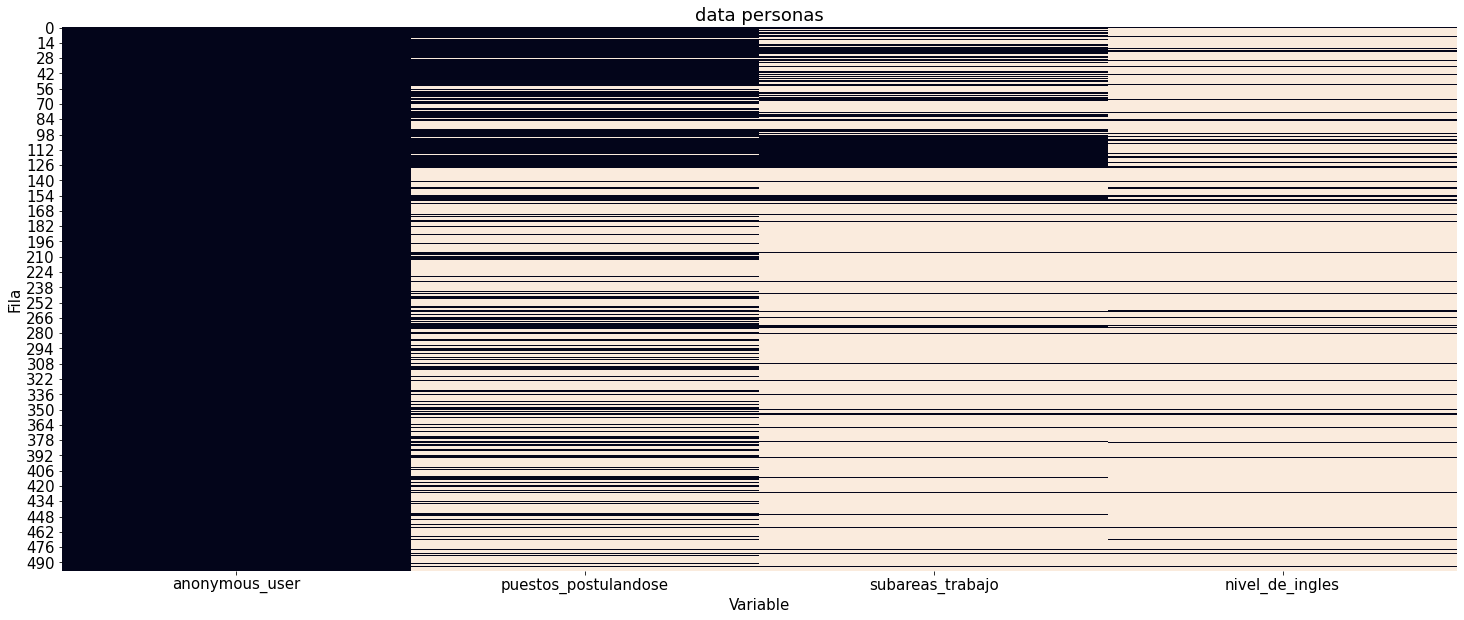

In [2]:
"""
Visualizamos el nivel de completitud del archivo
"""


import missingno as msno
import seaborn  as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(25,10))
sns.heatmap(personas_df.isnull(), cbar=False)
plt.title("data personas")
plt.xlabel('Variable')
plt.ylabel('Fila')

### Datos de las vacantes de trabajo disponibles

En este segundo bloque de codigo debes implementar un proceso que traiga vacantes publicas disponibles de alguna fuente de datos relevante, e.j. Linkedin. El proceso sugerido es: 

1. Definir fuente de datos y viabilidad de la extraccion de datos con Web-scrapping
2. Definir atributos relevantes de las vacantes a extraer para armar la estructura del dataframe
3. Asegurate de guardar todos los datos de vacantes en un dataframe `vacantes_df`

**Ten en cuenta, que los atributos a escoger de las vacantes deben de alguna manera permitirte hacer match con la data de las personas que te fue otorgada en el paso anterior**.

Es important anotar que solo es preciso que construyas un flujo que te permita guardar los datos en un dataframe, NO es necesario montar una base de datos SQL ni nada similar.

Aquí te dejamos algunos ejemplos de procesos de extraccion de vacantes de empleo de algunos portales: 

* [Usando Selenium o Scrapy](https://towardsdatascience.com/when-job-hunting-meets-data-science-part-1-e8f64867d8c)
* [Otro caso de uso con Scrapy](https://towardsdatascience.com/automate-your-job-search-with-python-and-github-actions-1dc818844c0)
* [Automatic job search with python](https://towardsdatascience.com/automating-my-job-search-with-python-ee2b465c6a8f)

In [2]:
# escribe tu código aquí
import urllib
import requests
from bs4 import BeautifulSoup

"""
importamos librerias a usar para el web scraping
"""


vacantes_df = ''

In [223]:
"""
Usamos las palabras claves de las ofertas para optimizar las busquedas en la página a consultar
"""

puestos_postulandose

['PROJECT MANAGER',
 'PRODUCT OWNER',
 'KAM',
 'PRODUCT MANAGER',
 '',
 'BUSINESS DEVELOPMENT',
 'SCRUM MASTER',
 'ANALISTA DE MARKETING',
 'ACCOUNT MANAGER',
 'BUSINESS ANALYST',
 'DISEÑADOR UX/UI',
 'EJECUTIVO DE CUENTA',
 'DIRECTOR DE MARKETING',
 'CONTENT MANAGER',
 'BRAND MANAGER',
 'DIRECTOR COMERCIAL',
 'PROJECT MANAGEMENT',
 'EJECUTIVO COMERCIAL',
 'SALES MANAGER',
 'DIRECTOR DE VENTAS',
 'COORDINADOR DE PROYECTOS',
 'MARKETING',
 'ACCOUNT EXECUTIVE',
 'CUSTOMER SUCCESS MANAGER',
 'MARKETING SPECIALIST',
 'CATEGORY MANAGER',
 'DIRECTOR DE PROYECTOS',
 'BUSINESS DEVELOPMENT REPRESENTATIVE',
 'GERENTE DE MARKETING',
 'ANALISTA COMERCIAL',
 'GERENCIA DE PROYECTOS',
 'GERENTE COMERCIAL',
 'EXPERIENCIA DEL CLIENTE',
 'BUSINESS DEVELOPER',
 'ANALISTA DE DESARROLLO DE NEGOCIOS',
 'DISEÑADOR DE PRODUCTO',
 'JEFE DE COMPRAS',
 'PEOPLE AND CULTURE',
 'GROWTH',
 'JEFE DE SERVICIO AL CLIENTE/EXPERIENCIA DEL CLIENTE',
 'SENIOR PRODUCT OWNER',
 'E-COMMERCE SPECIALIST',
 'ANALISTA DE COMPRAS'

In [7]:
%%time
"""
Obtenemos las urls de todas las páginas de cada palabra clave, apoyandonos en el buscador de la página, 
usamos computrabajo para obtener ofertas en español dado que las vacantes estan en ese idioma
Extraemos, el nombre de la oferta, la descripcióny demás detalles de todas las url obtenidas anteriormente
y las almacenamos en un alista de diccionarios, para almacenar el resultado fácilmente
"""

ofertas = []
for key_word in puestos_postulandose:
    for i in range(4):
        getVars = {'q' : key_word, 'p' : str(i)}
        url = 'https://www.computrabajo.com.co/trabajo-de-{0}?'.format(str(getVars['q']).lower())+ urllib.parse.urlencode(getVars)
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")

        job_links = soup.select('.js-o-link')
        jobs_by_page = [job['href'] for job in job_links]
        for url in jobs_by_page:
            vacante = {}
            vacante['url'] = 'https://www.computrabajo.com.co'+url
            page = requests.get(vacante['url'])
            if page.status_code == 400:
                pass
            else:
                soup = BeautifulSoup(page.content, "html.parser")
                vacante['key_word'] = key_word
                vacante['nombre'] = soup.select('h1[class="m0"]')[0].get_text()
                vacante['descripcion'] = soup.select('ul[class="p0 m0"]')[0].get_text()
                for i in soup.select('li[class="mb5"]'):
                    if len(i.get_text().split(':'))>1:
                        vacante[i.get_text().split(':')[0]] = i.get_text().split(':')[1]
                ofertas.append(vacante)


CPU times: user 22min 13s, sys: 26.2 s, total: 22min 39s
Wall time: 2h 9min 2s


In [645]:
"""
Dimensonamos la lista de ofertas
"""

len(ofertas)

10295

In [648]:
"""
Guardamos la lista en un archivo .json, para continuar trabajando mas tarde, 
sin tener que volver a hacer el escarpado web
"""

import json
file = 'ofertas.json'
json.dump( ofertas, open( file, 'w' ) )

In [2]:
"""
Retomamos el trabajo hecho antes
"""

import json
file = 'ofertas.json'
ofertas = json.load( open( file ) )
len(ofertas)

10295

In [227]:
%%time
"""
Creamos el DataFrame para las ofertas, segun el enunciado, 
con todos los detalles obtenidos y almacenados en el .json
"""

df_vacantes_T = pd.DataFrame(columns=['index'])
for vacante in ofertas:
    df_vacantes_T = pd.merge(df_vacantes_T, pd.DataFrame.from_dict(vacante, orient='index').reset_index(), how = 'outer', on='index' )
    
df_vacantes_T.index = df_vacantes_T['index']
df_vacantes_T.drop(columns=['index'],inplace=True)
df_vacantes = df_vacantes_T.T
df_vacantes.reset_index(drop=True, inplace=True)
df_vacantes.drop_duplicates(subset='url', inplace = True)
df_vacantes

<timed exec>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.


CPU times: user 2min, sys: 75.7 ms, total: 2min
Wall time: 2min


index,url,key_word,nombre,descripcion,Educación mínima,Idiomas,Disponibilidad de viajar,Disponibilidad de cambio de residencia,Personas con discapacidad,Edad,Conocimientos,Licencias de conducir
0,https://www.computrabajo.com.co/ofertas-de-tra...,PROJECT MANAGER,I-Latam IT Project Manager- English level C1,\nDescripción\nEl Project Manager especializad...,Universidad / Carrera Profesional,Inglés,Si,Si,Sí,NaN,NaN,NaN
1,https://www.computrabajo.com.co/ofertas-de-tra...,PROJECT MANAGER,Project Manager (Software Implementation),\nDescripción\nSutherland is looking for IT Pr...,Universidad / Carrera Profesional,Inglés,No,No,Sí,A partir de 18 años,Gestión de proyectos,NaN
2,https://www.computrabajo.com.co/ofertas-de-tra...,PROJECT MANAGER,Project Manager - Social Media Manager,\nDescripción\nHaz parte de nuestro equipo de ...,Universidad / Carrera Profesional,NaN,No,No,Sí,NaN,NaN,NaN
3,https://www.computrabajo.com.co/ofertas-de-tra...,PROJECT MANAGER,project manager- Digital,\nDescripción\nRequerimos para nuestro equipo ...,Universidad / Carrera Profesional,Inglés,Si,Si,Sí,NaN,NaN,NaN
4,https://www.computrabajo.com.co/ofertas-de-tra...,PROJECT MANAGER,Gerente De Proyecto Regional IT / Project Mana...,\nDescripción\nPrestigiosa compañía multinacio...,Universidad / Carrera Profesional,NaN,No,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10267,https://www.computrabajo.com.co/ofertas-de-tra...,ANALISTA DE PLANEACIÓN FINANCIERA,Analista de planeacion financiera,\nDescripción\n¡Buscamos el mejor talento! No...,Universidad / Carrera Profesional,NaN,No,No,Sí,NaN,Microsoft Excel,NaN
10281,https://www.computrabajo.com.co/ofertas-de-tra...,TALLERISTA,Asesor/a de libros con experiencia como como t...,\nDescripción\nReconocida librería y papelería...,Universidad / Carrera Profesional,NaN,No,No,Sí,NaN,NaN,NaN
10282,https://www.computrabajo.com.co/ofertas-de-tra...,TALLERISTA,Tallerista Ocupacional,\nDescripción\nSe solicita tallerista ocupacio...,Universidad / Carrera técnica,NaN,No,No,Sí,entre 25 y 45 años,NaN,NaN
10283,https://www.computrabajo.com.co/ofertas-de-tra...,TALLERISTA,"Se requieren psicólogos, auxiliares de enferme...",\nDescripción\nFormadores (bachiller) atención...,Universidad / Carrera técnica,NaN,No,No,Sí,entre 25 y 45 años,NaN,NaN


In [642]:
"""
Analizamos la "Distribución" de la variable que nos idica 
el nivel de inglés utilizado en las publicaicones de la página
"""
df_vacantes['Idiomas'].value_counts()

 Inglés                 657
 Español                113
 Español ,Inglés         34
  ,Inglés                16
 Inglés ,Portugués        6
 Portugués                3
  ,Español                1
 Francés                  1
 Español ,Portugués       1
Name: Idiomas, dtype: int64

Text(199.0, 0.5, 'Fila')

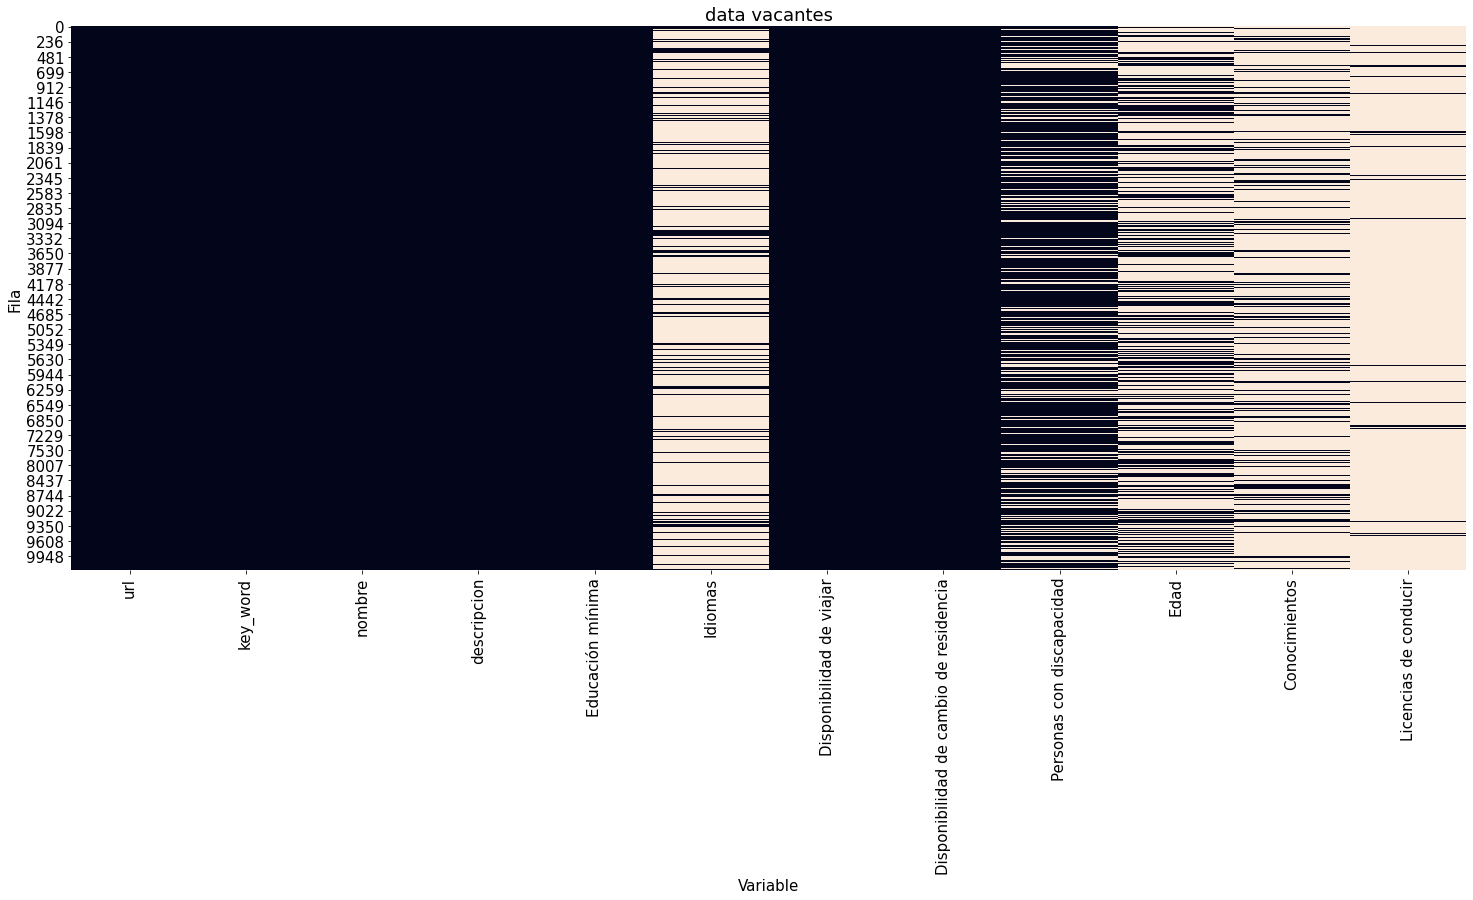

In [644]:
"""
Visualizamos la completitud del escarpado en el DataFrame final
"""

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(25,10))
sns.heatmap(df_vacantes.isnull(), cbar=False)
plt.title("data vacantes")
plt.xlabel('Variable')
plt.ylabel('Fila')

## Fase 2: Construcción y ejecución del modelo

En esta segunda parte vas a construir el sistema de generacion de recomendaciones dados los dos dataframes: `personas_df` y `vacantes_df`. 

1. Como primera iteración podemos pensar en que una vacante es relevante para una persona si el titulo de la vacante es cercano a alguno de los trabajos incluidos en el campo `puestos_postulandose` de la persona en cuestion. Esta cercanía se puede calcular por medio de un algoritmo de match semántico con un embedding o por medio de una distancia levenstein entre cadenas de texto. 

* [¿Qué es la distancia de Levenstein?](https://es.wikipedia.org/wiki/Distancia_de_Levenshtein)
* [¿Que es el match semántico?](https://tfhub.dev/google/universal-sentence-encoder/1)

2. Si podemos extraer el nivel de ingles de las vacantes podemos hacer un filtro para que solo se le recomiende a la persona vacantes para las cuales su nivel de ingles es suficiente. 

Con base en las dos ideas anteriores, construye un algoritmo que permita recomendarle a cada persona las 5 vacantes que son mas afines según las variables `puestos_postulandose` y `nivel_de_ingles`. 

Puedes revisar el compendio general de tecnicas para similitud semántica en este [articulo](https://medium.com/@adriensieg/text-similarities-da019229c894) 


Como armarías las recomendaciones con todas las ideas y sugerencias presentadas ? deja tu codigo listo para ejecucion en el siguiente bloque: 

In [216]:
# escribe tu código aquí
"""
Inicializamos la función de distancia sugerida en el enunciado
"""

def LevenshteinDistance(str1, str2):
    d=dict()
    for i in range(len(str1)+1):
        d[i]=dict()
        d[i][0]=i
    for i in range(len(str2)+1):
        d[0][i] = i
    for i in range(1, len(str1)+1):
        for j in range(1, len(str2)+1):
            d[i][j] = min(d[i][j-1]+1, d[i-1][j]+1, d[i-1][j-1]+(not str1[i-1] == str2[j-1]))
    return d[len(str1)][len(str2)]

In [217]:
import re
import unicodedata

"""
Creamos una variable booleana en los dos DataFrames para identificar 
si hay nivel de inglés tanto de las ofertas como de los aspirantes

Editamos el nombre de las ofertas de empleo, respecto a caracteres especiales,
conservando letras como la ñ y eliminando los espacios para reducir la distancia 
posible de Levenshtein a calcular
"""

personas_df['ingles?'] = np.where(personas_df['nivel_de_ingles'].notnull(),True,False)
df_vacantes['ingles?'] = df_vacantes['Idiomas'].apply(lambda x : bool(re.search(r'Inglés', str(x))))
df_vacantes['nombre_typed'] = df_vacantes['nombre'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('ascii'))
df_vacantes['nombre_typed'] = df_vacantes['nombre_typed'].apply(lambda x: re.sub('[^A-Za-z0-9]+', '', str(x).upper()))

In [218]:
"""
Visualizamos el resultado obtenido
"""
df_vacantes['nombre_typed'].value_counts(normalize=True)

ANALISTADEINVENTARIOSMANEJODEEXCELL                           0.003893
SOCIALMEDIAMANAGERNIVELB2YC1INGLES                            0.002920
GRANCONVOCATORIAASESORCOMERCIALFINANCIEROEXERNOURGENTE        0.002920
COMMUNITYMANAGER                                              0.002725
ANALISTADESELECCION                                           0.002336
                                                                ...   
ANALISTADEPLANEACIONYPROGRAMACIONDEMANTENIMIENTOAUTOMOTRIZ    0.000195
PROGRAMADORDEDESARROLLOANALISTADEDESARROLLO                   0.000195
ANALISTAGESTIONDEMETRICASKPIREPORTING                         0.000195
ANALISTADEMERCADEOURGENTE                                     0.000195
AUXILIARDEENFERMERIAENFERMERATALLERISTAAREASALUD              0.000195
Name: nombre_typed, Length: 4266, dtype: float64

In [232]:
"""
Visualizamos el estado actual del input de los aspirantes
"""
personas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   anonymous_user        498 non-null    object
 1   puestos_postulandose  201 non-null    object
 2   subareas_trabajo      106 non-null    object
 3   nivel_de_ingles       54 non-null     object
 4   ingles?               498 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 16.2+ KB


In [225]:
%%time
"""
Sistema de recomendaciones propuesto:

Para cada usuario, se recomiendan las 5 menores distancias de Levenshtein respecto al 
nombre de las ofertas y el puesto al que se postula, teniendo en cuenta que:

1. Se ponderando ofertas donde la palabras claves usadas en la busqueda de la página 
coincidan con el puesto al que se postula el aspirante, apoyandonos en la optimización 
de las busquedas de la página web

2. Se pondera las ofertas que solicitan un nivel de inglés cualquiera, si el aspirante 
indica tener un nivel de inglés cualquiera, la magnitud usada se basa en un valor medio
de las mínimas distancias calculadas, tal que no sesge la recomendacion a solo ofertas 
con inglés, dado que en varias iteraciones estas ofertas no eran las mas adecuadas para 
las aspiraciones del usuario

3. A las palabras claves usadas por el aspirante, se le realizo el mismo tratamiento que
a los nombres de las ofertas, realizado anteriormente

4. En el "archivo recomendaciones_DLesmes_fase2.csv" se guardo el input de los usuarios dado,
con una columna adicional, llamada "recommendation", que para cada usuario contiene las urls
de las ofertas recomendadas por el sistema
"""

personas_df['recommendation'] = np.nan
for aspirante in personas_df.index:
    df_vacantes[str(aspirante)] = 1000
    if personas_df.loc[aspirante,'ingles?']:
        ind = df_vacantes[df_vacantes['ingles?']].index
        df_vacantes.loc[ind,str(aspirante)] = 5
    if pd.notnull(personas_df.loc[aspirante,'puestos_postulandose']):
        as_key_words = personas_df.loc[aspirante,'puestos_postulandose'][1:-1].replace("\"","").split(",")
        for as_key_word in as_key_words:
            ind = df_vacantes[df_vacantes['key_word'] == as_key_word ].index
            df_vacantes.loc[ind,str(aspirante)] = 0
            tmp_kw = unicodedata.normalize('NFKD', str(as_key_word)).encode('ASCII', 'ignore').decode('ascii')
            tmp_kw = re.sub('[^A-Za-z0-9]+', '', str(tmp_kw).upper())
            df_vacantes[str(as_key_word)] = df_vacantes['nombre_typed'].apply(lambda x: LevenshteinDistance(tmp_kw, x))
        
        df_vacantes[str(aspirante)] = df_vacantes[str(aspirante)]+(df_vacantes[as_key_words].min(axis=1))
        df_vacantes[str(aspirante)] = pd.to_numeric(df_vacantes[str(aspirante)], errors='coerce')
        df_vacantes.drop(columns = as_key_words, inplace=True)
        recommendation = str(list(df_vacantes.sort_values(by=str(aspirante)).head(5)['url']))[1:-1]
        personas_df.loc[aspirante,'recommendation'] = recommendation
        

personas_df.to_csv('recomendaciones_DLesmes_fase2.csv', index = False, header=True, sep="|")

CPU times: user 33min 13s, sys: 1.62 s, total: 33min 15s
Wall time: 33min 16s


## Hazlo mejor por ti mismo !

¿Cómo podrías generar mejores recomendaciones? ¿que técnicas usarias para procesar variables de texto ? Danos tu mejor idea e inspiracion en esta parte final ideando un sistema de recomendaciones de vacantes espectacular, que sea mejor a todo lo presentado anteriormente. 

In [4]:
# escribe tu código aquí
"""
Importamos librerías a usar del ambiente creado en pip
"""

from tensorflow.keras.preprocessing.text import Tokenizer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from scipy.spatial import distance

2021-08-15 03:35:44.765250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-15 03:35:44.765286: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[nltk_data] Downloading package stopwords to /home/asf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
%%time
import re
import unicodedata

"""
Creamos una variable booleana en los dos DataFrames para identificar 
si hay nivel de inglés tanto de las ofertas como de los aspirantes

Editamos el nombre de las ofertas de empleo, respecto a caracteres especiales,
conservando letras como la ñ 

Tokenizamos los nombres editados de las ofertas, entrenamos el tokenizador 
con todo el corpus de las ofertas y vectorizamos los nombres de las ofertas tokenizadas
"""

personas_df['ingles?'] = np.where(personas_df['nivel_de_ingles'].notnull(),True,False)
df_vacantes['ingles?'] = df_vacantes['Idiomas'].apply(lambda x : bool(re.search(r'Inglés', str(x))))

df_vacantes['nombre_typed'] = df_vacantes['nombre'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('ascii'))
df_vacantes['nombre_typed'] = df_vacantes['nombre_typed'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x).lower()))
df_vacantes['nombre_typed'] = df_vacantes['nombre_typed'].apply(lambda x: [word for word in word_tokenize(str(x)) if not word in stopwords.words('spanish')])

tokenizer = Tokenizer()
tokenizer.fit_on_texts([w for l in df_vacantes['nombre_typed'] for w in l])


df_vacantes['nombre_typed'] = df_vacantes['nombre_typed'].apply(lambda x: np.squeeze(tokenizer.texts_to_sequences(x)))


CPU times: user 6.73 s, sys: 484 ms, total: 7.21 s
Wall time: 7.22 s


In [233]:
"""
Visualizamos el resultado del procedimiento anterior
"""
df_vacantes['nombre_typed']

0                   [396, 854, 235, 117, 16, 207, 712, 48]
1                                     [117, 16, 146, 1432]
2                                   [117, 16, 43, 119, 16]
3                                            [117, 16, 34]
4                     [17, 52, 214, 235, 117, 16, 23, 139]
                               ...                        
10267                                         [1, 108, 98]
10281                  [9, 2625, 2, 1049, 456, 2626, 2, 3]
10282                                          [1049, 409]
10283    [2627, 1323, 414, 148, 2628, 2629, 314, 2630, ...
10284                        [29, 148, 392, 1049, 181, 54]
Name: nombre_typed, Length: 5137, dtype: object

In [234]:
"""
Visualizamos el estado actual del input de los aspirantes
"""
personas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   anonymous_user        498 non-null    object
 1   puestos_postulandose  201 non-null    object
 2   subareas_trabajo      106 non-null    object
 3   nivel_de_ingles       54 non-null     object
 4   ingles?               498 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 16.2+ KB


In [373]:
%%time
"""
Sistema de recomendaciones propuesto:

Para cada usuario, se recomiendan las 5 menores distancias de jensenshannon respecto al 
nombre de las ofertas y el puesto al que se postula, teniendo en cuenta que:

1. Se ponderando ofertas donde su la palabras claves usadas en la busqueda de la página 
coincidan con el puesto al que se postula el aspirante, apoyandonos en la optimización 
de las busquedas de la página web

2. Se pondera las ofertas que solicitan un nivel de inglés cualquiera, si el aspirante 
indica tener un nivel de inglés cualquiera, la magnitud usada se basa en un valor medio
de las máximas distancias calculadas, tal que no sesge la recomendacion a solo ofertas 
con inglés, dado que en varias iteraciones estas ofertas no eran las mas adecuadas para 
las aspiraciones del usuario

3. A las palabras claves usadas por el aspirante, se le realizo el mismo tratamiento que
a los nombres de las ofertas, realizado anteriormente

4. En el "archivo recomendaciones_DLesmes_version2.csv" se guardo el input de los usuarios dado,
con una columna adicional, llamada "recommendation", que para cada usuario contiene las urls
de las ofertas recomendadas por el sistema
"""

personas_df['recommendation'] = np.nan
for aspirante in personas_df.index:
    df_vacantes[str(aspirante)] = 1000
    if personas_df.loc[aspirante,'ingles?']:
        ind = df_vacantes[df_vacantes['ingles?']].index
        df_vacantes.loc[ind,str(aspirante)] = 0.5
    if pd.notnull(personas_df.loc[aspirante,'puestos_postulandose']):
        as_key_words = personas_df.loc[aspirante,'puestos_postulandose'][1:-1].replace("\"","").split(",")
        for as_key_word in as_key_words:
            ind = df_vacantes[df_vacantes['key_word'] == as_key_word ].index
            df_vacantes.loc[ind,str(aspirante)] = 0
            tmp_kw = unicodedata.normalize('NFKD', str(as_key_word)).encode('ASCII', 'ignore').decode('ascii')
            tmp_kw = re.sub('[^A-Za-z0-9]+', ' ', str(tmp_kw).lower())
            tmp_kw = [word for word in word_tokenize(str(tmp_kw)) if not word in stopwords.words('spanish')]
            tmp_kw = [[0] if token==[] else token for token in tokenizer.texts_to_sequences(tmp_kw)]
            tmp_kw = np.squeeze(tmp_kw)
            for ref in df_vacantes['nombre_typed'].index:
                if type(df_vacantes.loc[ref,'nombre_typed']) == int or tmp_kw.size==1:
                    df_vacantes.loc[ref,str(as_key_word)] = distance.jensenshannon(tmp_kw,df_vacantes.loc[ref,'nombre_typed'])

                else :
                    ml = max(tmp_kw.size,df_vacantes.loc[ref,'nombre_typed'].size)
                    v1 = np.concatenate((tmp_kw , np.zeros(ml-tmp_kw.size)))
                    v2 = np.concatenate((df_vacantes.loc[ref,'nombre_typed'] , np.zeros(ml-df_vacantes.loc[ref,'nombre_typed'].size)))
                    df_vacantes.loc[ref,str(as_key_word)] = distance.jensenshannon(v1,v2)
                        
        df_vacantes[str(aspirante)] = df_vacantes[str(aspirante)]+(df_vacantes[as_key_words].min(axis=1))
        df_vacantes[str(aspirante)] = pd.to_numeric(df_vacantes[str(aspirante)], errors='coerce')
        df_vacantes.drop(columns = as_key_words, inplace=True)
        recommendation = str(list(df_vacantes.sort_values(by=str(aspirante), ascending=True).head(5)['url']))[1:-1]
        personas_df.loc[aspirante,'recommendation'] = recommendation
        

personas_df.to_csv('recomendaciones_DLesmes_version2.csv', index = False, header=True, sep="|")

/home/asf/Documents/PruebaTecnicaDataScientistWorkijobs/env_pruebatecnica_wj/lib/python3.8/site-packages/scipy/spatial/distance.py:1290: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=axis, keepdims=True)


CPU times: user 26min 30s, sys: 831 ms, total: 26min 31s
Wall time: 26min 32s


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae6eb7be-f8e0-4cb7-81fd-2db19d09c955' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>